# HR_attrition_rate

Abstract:

Employee turnover is a serious concern in knowledge based organizations. When employees leave as organization, they carry with them invaluable tacit knowledge which is very often the source of competitive advantage for the business. In order for an organization to continually have a higher competitive advantage over its competition, it should make it a duty to minimize employee attirition. This study identifies employee related attributes that contribute to the prediction of employees' attrition in organization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\poovi\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [51]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

# EDA

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

As our dataset have no null values we can further continue with our EDA process

Observations:
    
    1.'Age'
    
    2.'Attrition'
    
    3.'BusinessTravel'
    
    4.'DailyRate'
    
    5.'Department'
       
    6.'DistanceFromHome'
    
    7.'Education'
    
    8.'EducationField'
    
    9.'EmployeeCount',
    
    10.'EmployeeNumber'
        
    11.'EnvironmentSatisfaction'
    
    12.'Gender'
    
    13.'HourlyRate'
       
    14.'JobInvolvement'
    
    15.'JobLevel'
    
    16.'JobRole'
    
    17.'JobSatisfaction'
       
    18.'MaritalStatus'
        
    19.'MonthlyIncome'
    
    20.'MonthlyRate'
    
    21.'NumCompaniesWorked'
    
    22.'Over18'
    
    23.'OverTime'
    
    24.'PercentSalaryHike'
    
    25.'PerformanceRating'
       
    26.'RelationshipSatisfaction'
    
    27.'StandardHours'
    
    28.'StockOptionLevel'
       
    29.'TotalWorkingYears'
    
    30.'TrainingTimesLastYear'
    
    31.'WorkLifeBalance'
       
    32.'YearsAtCompany'
        
    33.'YearsInCurrentRole'
    
    34.'YearsSinceLastPromotion',
       
    35.'YearsWithCurrManager'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

we can find there are many categorical column we can convert them to numerical column by using label encoder

In [6]:
cols = df.columns
num_cols = df._get_numeric_data().columns

categorical_data = list(set(cols)-set(num_cols))
categorical_data

['Gender',
 'MaritalStatus',
 'Attrition',
 'JobRole',
 'Over18',
 'Department',
 'EducationField',
 'OverTime',
 'BusinessTravel']

# Label Encoder

Converting categorical columns into numeric using Label encoder

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in categorical_data:
    df[i] = le.fit_transform(df[i])

In [8]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In few columns difference between 75% and maximum value is more which conforms outliers are present and differnce between mean and 50% is more in few columns which confirms skewness in our dataset

In [10]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


<AxesSubplot:>

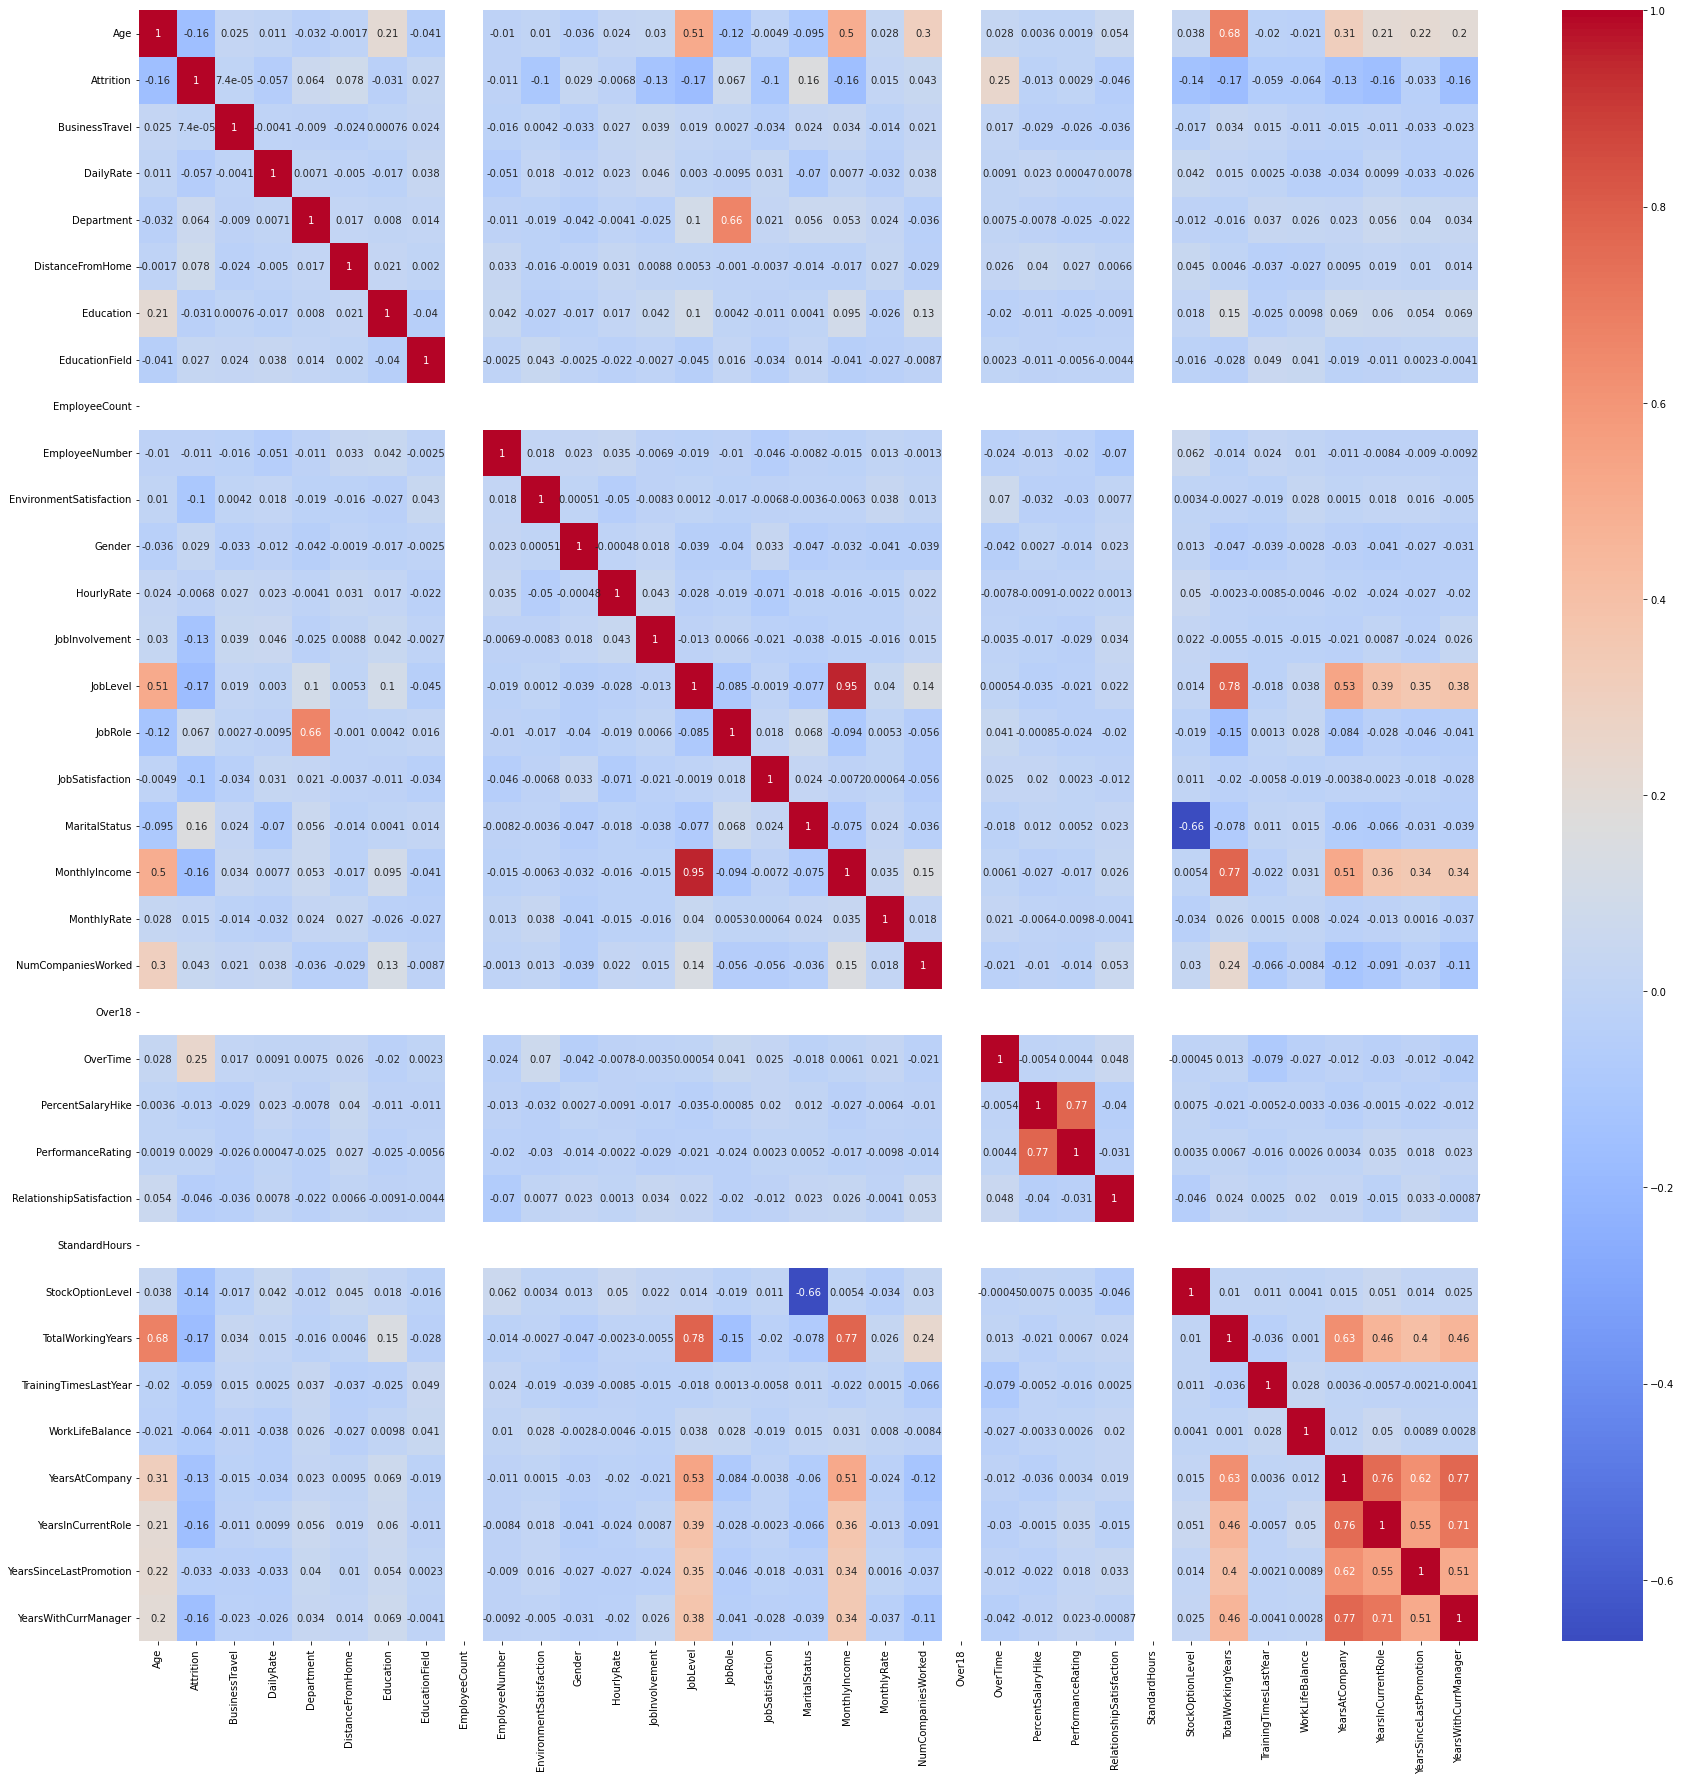

In [11]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Here we can find that 'employee count','standard hours','over18' have no correlation with dataset so we can drop it to get more accuracy.

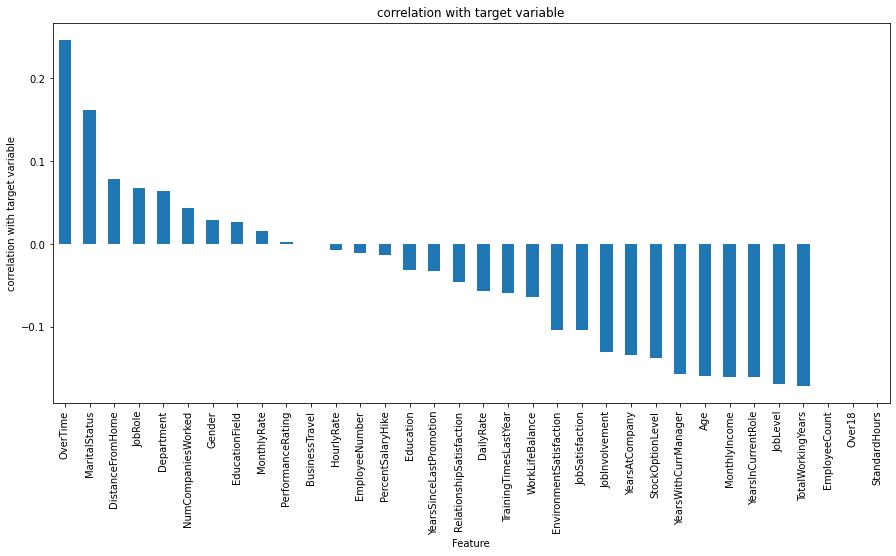

In [12]:
plt.figure(figsize=(15,7))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot.bar()
plt.xlabel("Feature")
plt.ylabel("correlation with target variable")
plt.title("correlation with target variable")
plt.show()

from this we can observe that employee having more experience will not leave job and employee who works overtime is more likely to leave job

In [13]:
df.drop(['BusinessTravel','EmployeeCount','Over18','StandardHours'],inplace=True,axis=1)

In [14]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Identifying skewness:

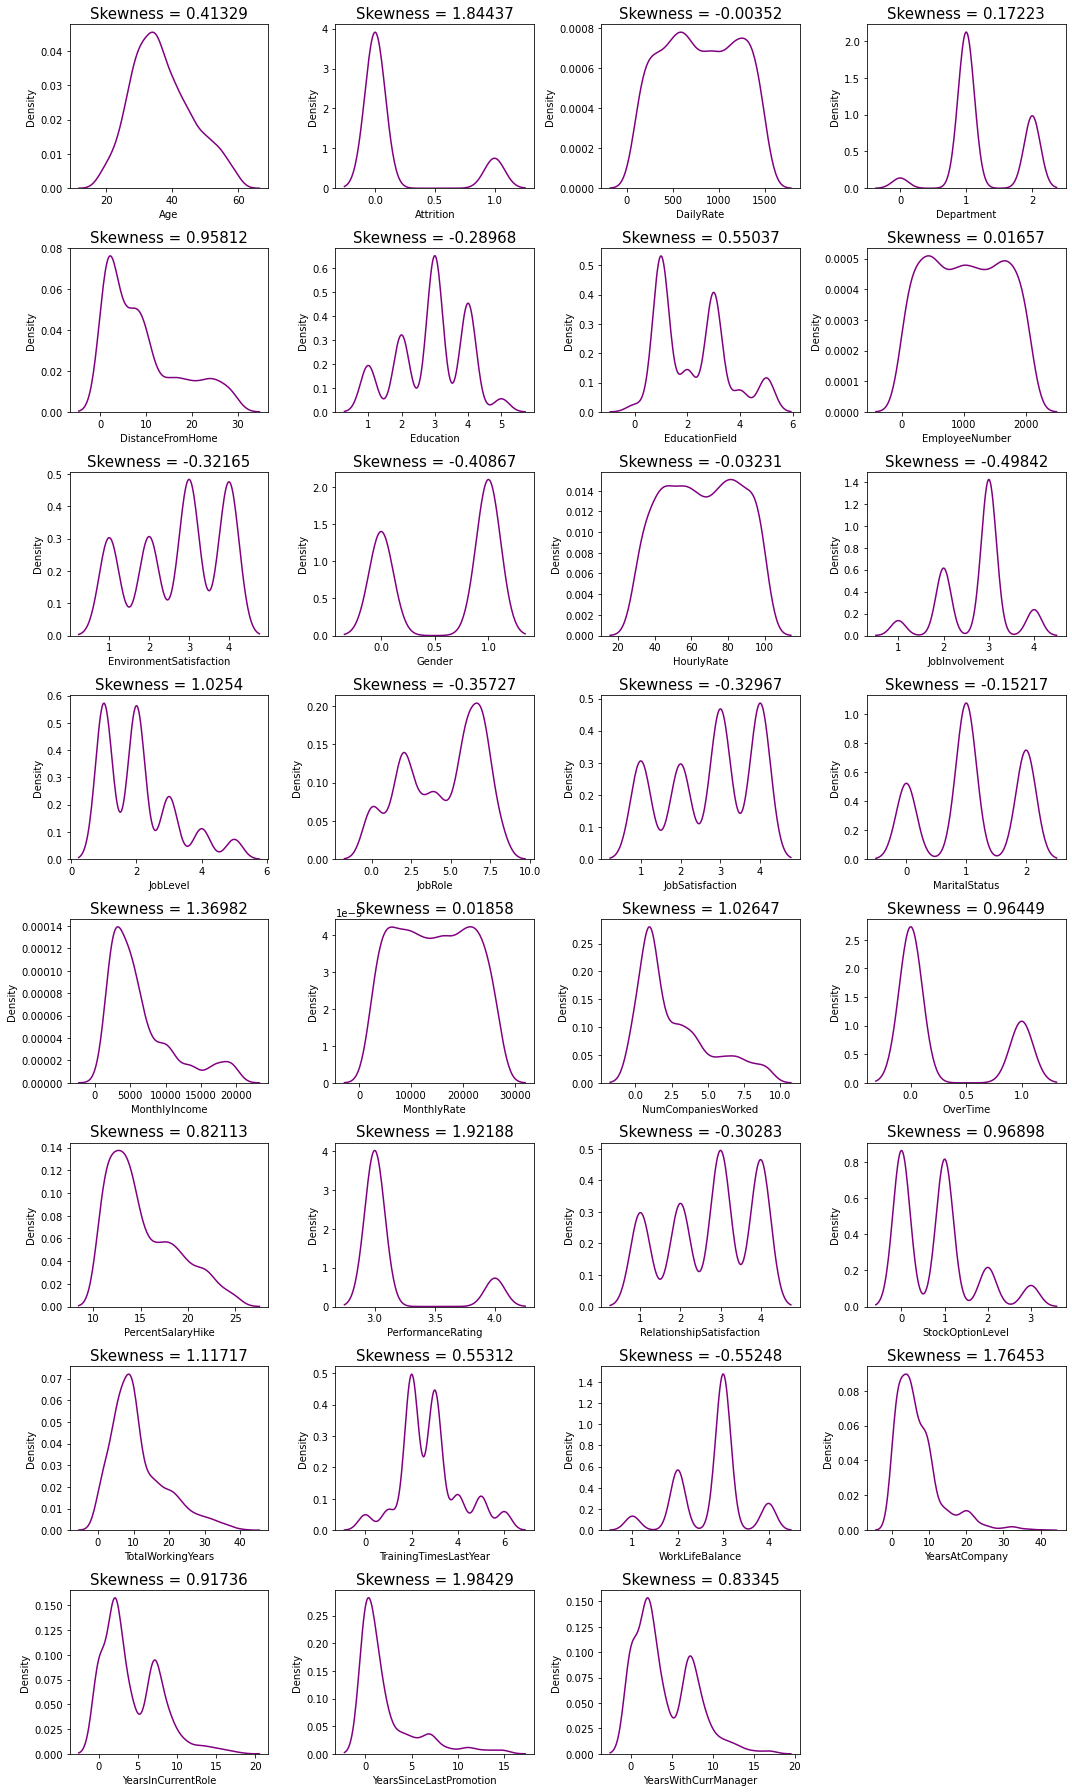

In [15]:
plt.figure(figsize=(15,25))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(8,4,i+1)         
    sns.kdeplot(df[collist[i]], color = "purple")
    plt.title(f"Skewness = {round(df[collist[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

In [16]:
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [17]:
df.skew().mean()

0.5159015697045992

# Key Observation:

we have 20 columns which has skewness greater than +/- 0.5.


# Removing skewness using power transform method

In [18]:
x = df.drop(['Attrition'],axis=1)
y = df['Attrition']

In [19]:
x.shape

(1470, 30)

In [20]:
y.shape

(1470,)

In [21]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[ 0.52213976,  0.7592893 ,  1.37745428, ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.27641097, -1.33459724, -0.47212715, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.10209148,  1.34036452, -0.47212715, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.12375507, -1.75171312, -0.47212715, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.27641097,  0.58323545,  1.37745428, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.23618832, -0.35884464, -0.47212715, ..., -0.08961473,
         0.09685415, -0.40688122]])

In [22]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

18    0.964489
28    0.212129
19    0.116250
11    0.103624
22    0.087019
24    0.058058
17    0.014814
2     0.013801
15    0.000000
20    0.000000
3    -0.007468
0    -0.007603
5    -0.008386
26   -0.008683
23   -0.010653
25   -0.012286
10   -0.020365
27   -0.060849
29   -0.067565
4    -0.099881
9    -0.106461
14   -0.156911
16   -0.184087
21   -0.193634
1    -0.196160
7    -0.205395
13   -0.212815
6    -0.288025
12   -0.319659
8    -0.408665
dtype: float64

In [23]:
x = pd.DataFrame((x_new),columns=x.columns)

# Detecting Outliers

Age                            AxesSubplot(0.125,0.799681;0.168478x0.0803191)
DailyRate                   AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
Department                  AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
DistanceFromHome            AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
Education                      AxesSubplot(0.125,0.703298;0.168478x0.0803191)
EducationField              AxesSubplot(0.327174,0.703298;0.168478x0.0803191)
EmployeeNumber              AxesSubplot(0.529348,0.703298;0.168478x0.0803191)
EnvironmentSatisfaction     AxesSubplot(0.731522,0.703298;0.168478x0.0803191)
Gender                         AxesSubplot(0.125,0.606915;0.168478x0.0803191)
HourlyRate                  AxesSubplot(0.327174,0.606915;0.168478x0.0803191)
JobInvolvement              AxesSubplot(0.529348,0.606915;0.168478x0.0803191)
JobLevel                    AxesSubplot(0.731522,0.606915;0.168478x0.0803191)
JobRole                        AxesSubplot(0.125,0.510532;0.1684

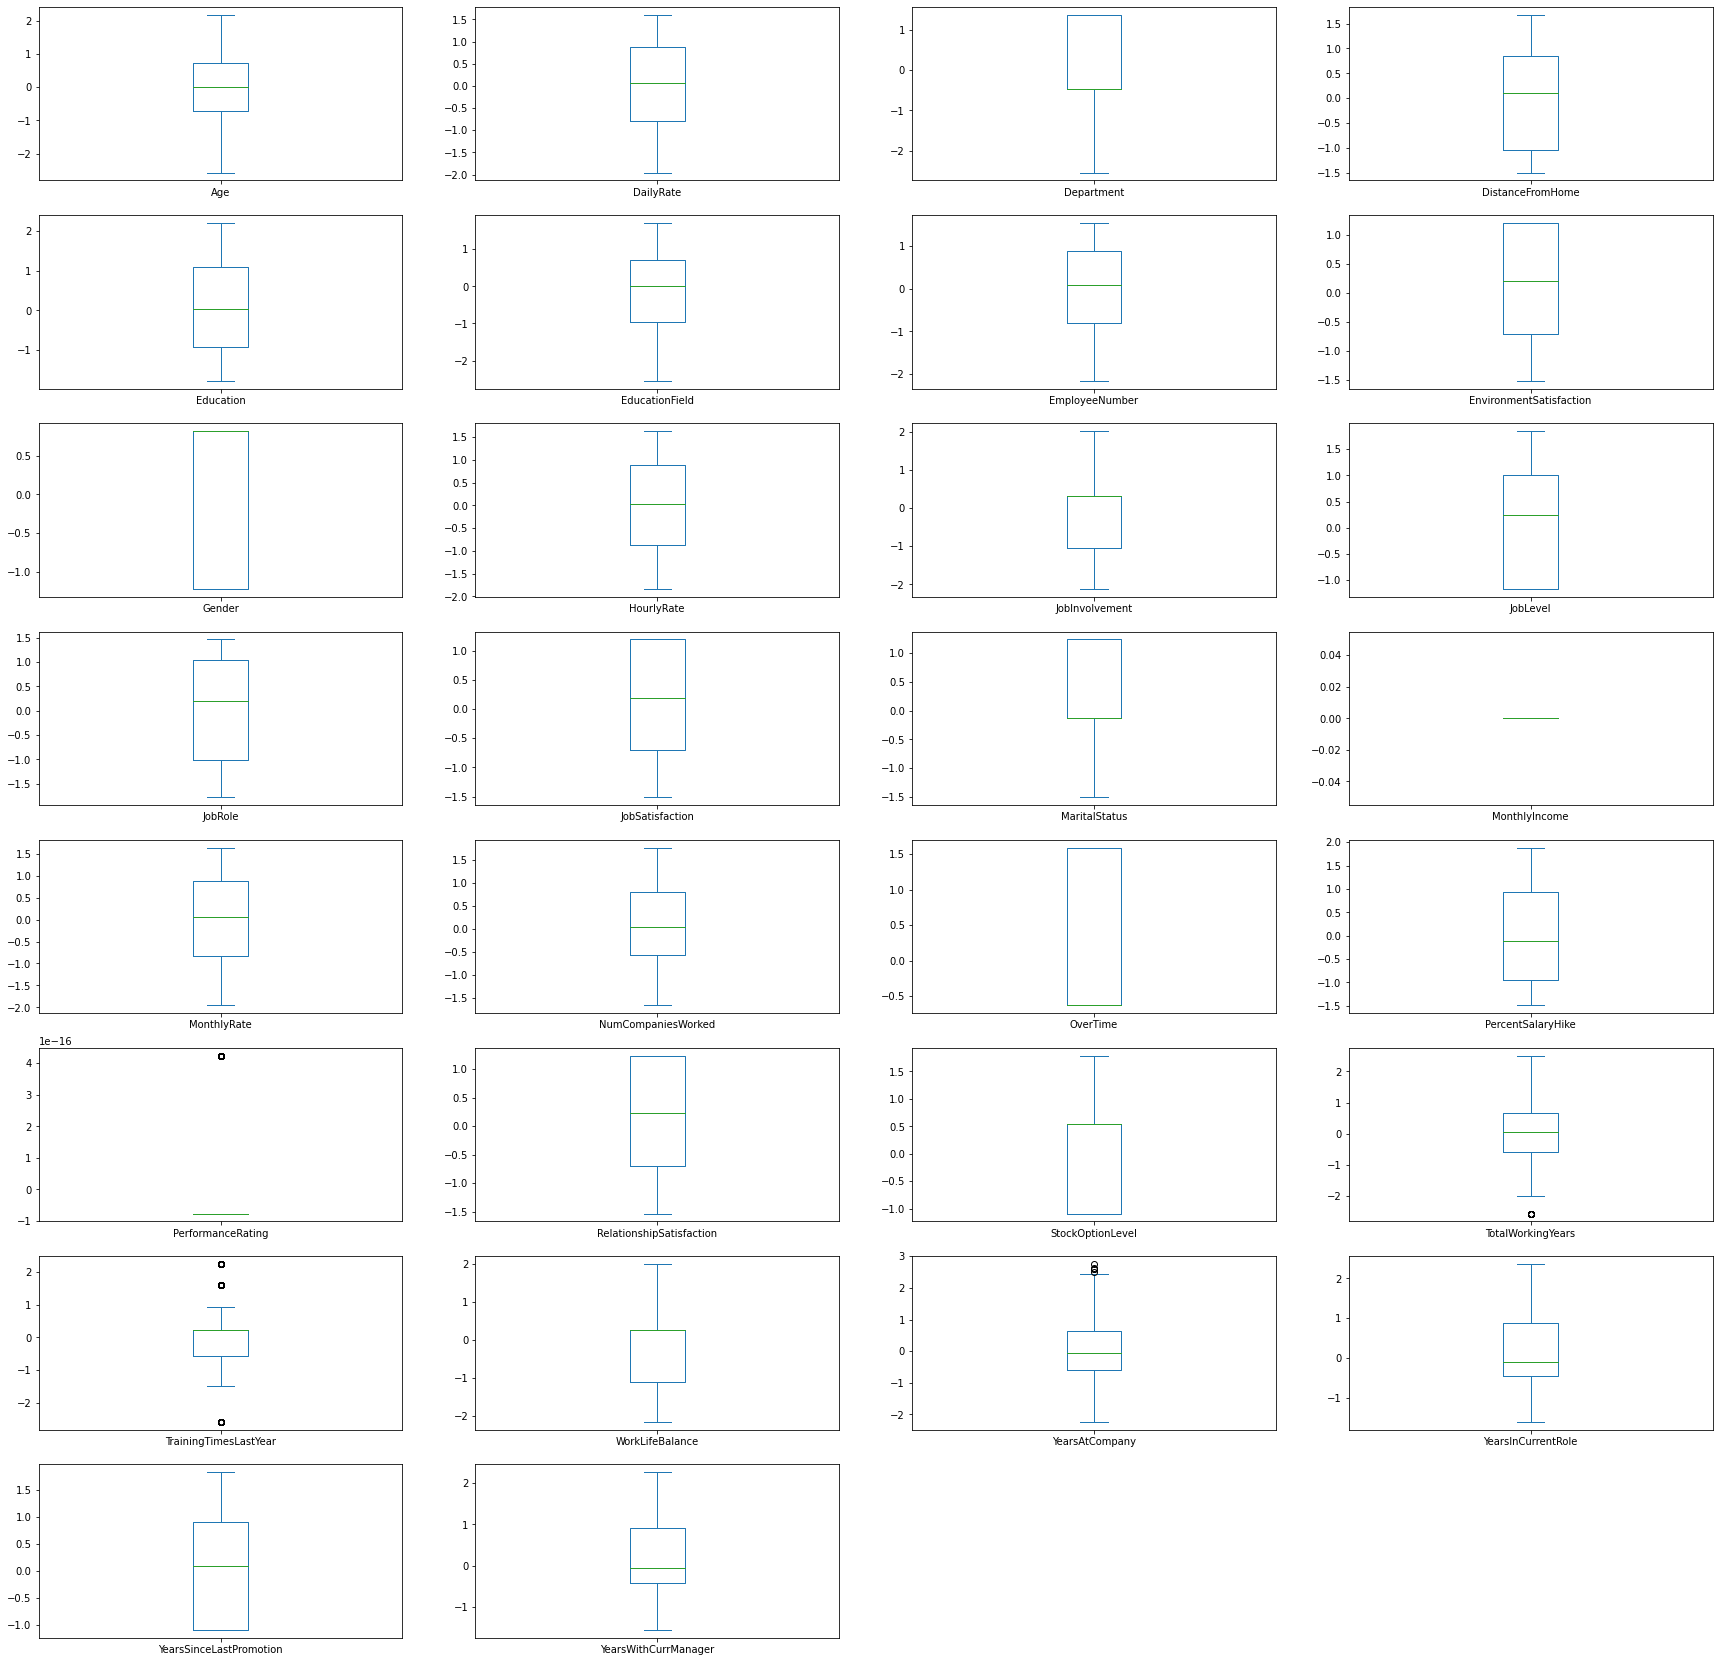

In [24]:
x.plot(kind='box',subplots='True',layout=(8,4),figsize=(30,30))

# Key Observations:

Outliers are present in 'PerformanceRating', 'YearsAtCompay','TrainingTimesLastYear', 'TotalWorkingYears' columns

In [25]:
from scipy.stats import zscore
z = np.abs(zscore(x))
threshold = 3

x_new = x[(z<3).all(axis=1)]

In [26]:
print("Old DataFrame : ",x.shape)
print("New DataFrame : ",x_new.shape)
print("total rows dropped : ",x.shape[0] - x_new.shape[0])

Old DataFrame :  (1470, 30)
New DataFrame :  (0, 30)
total rows dropped :  1470


Here all rows are dropped so we can continue training our model with outliers present

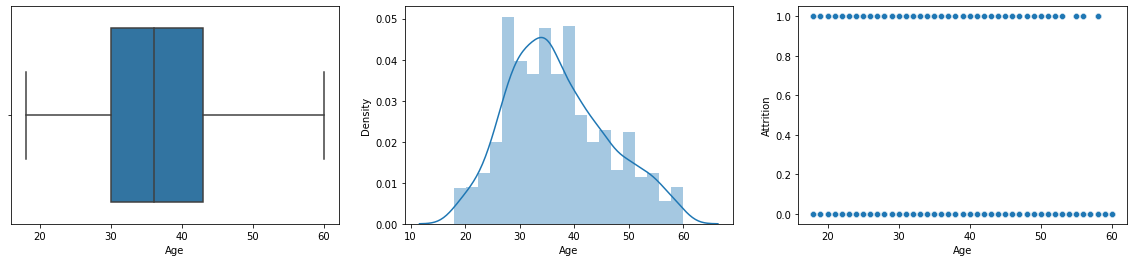

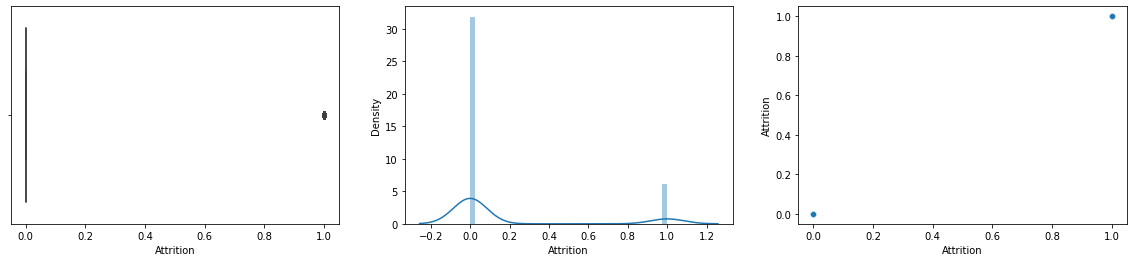

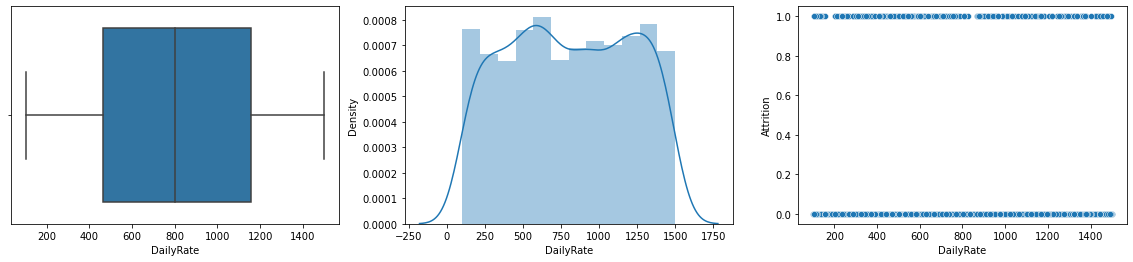

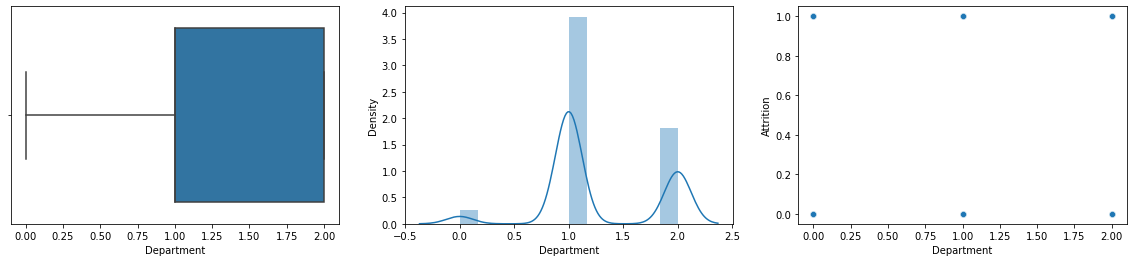

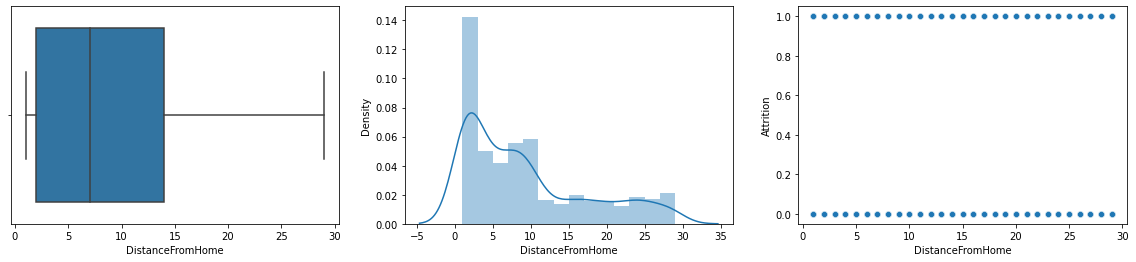

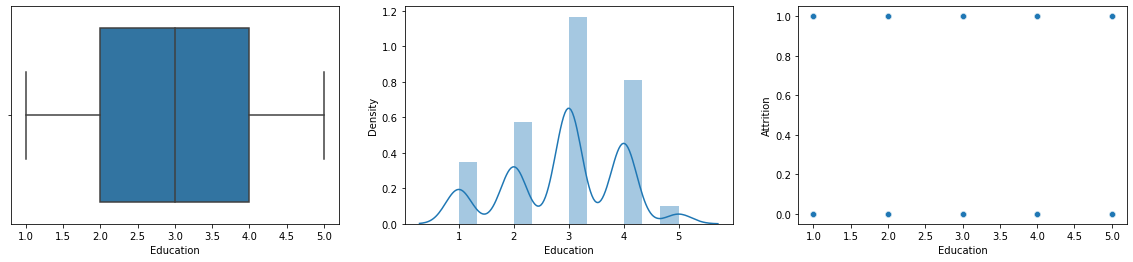

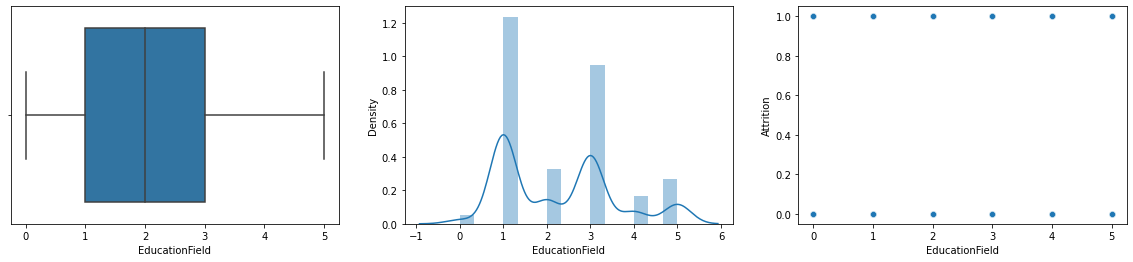

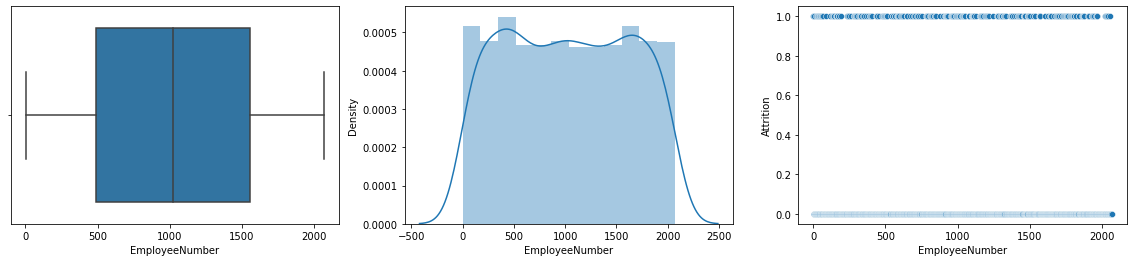

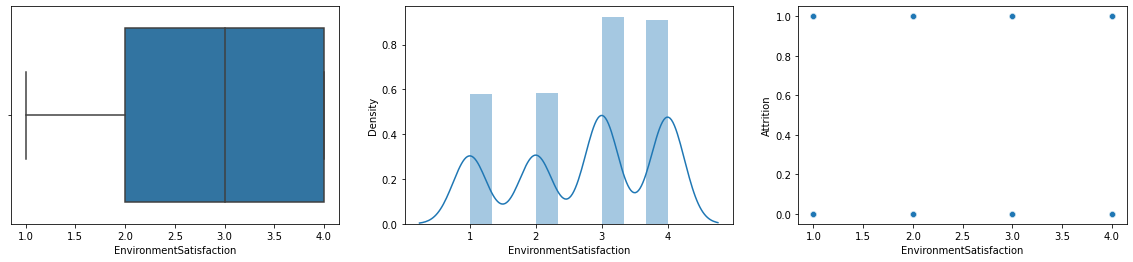

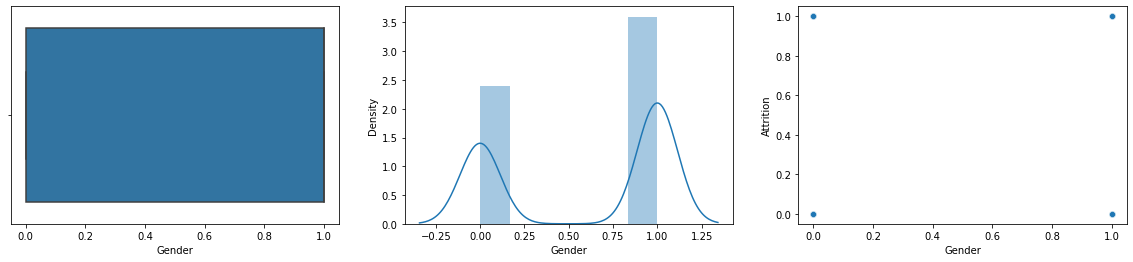

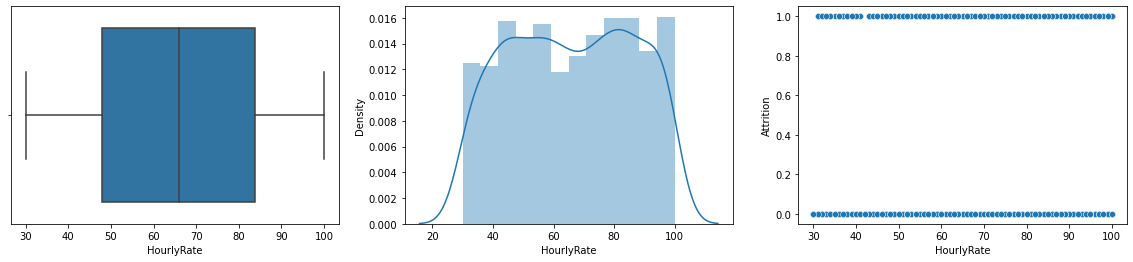

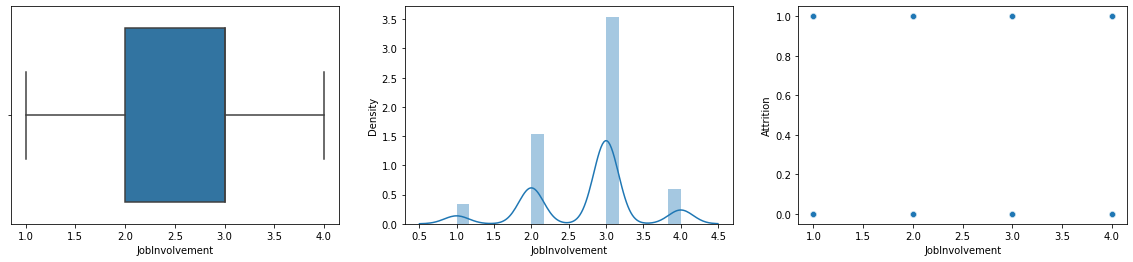

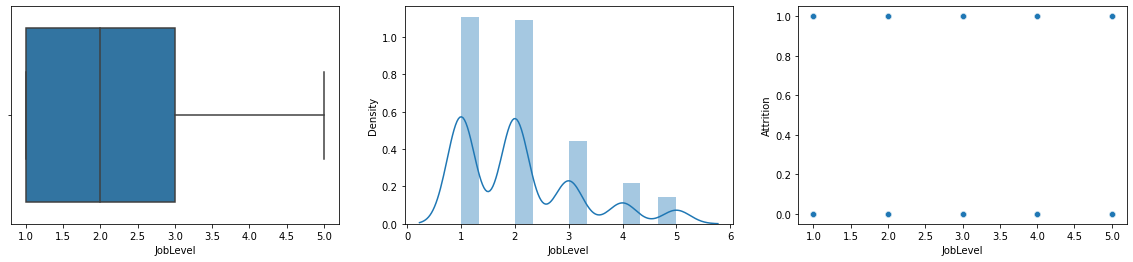

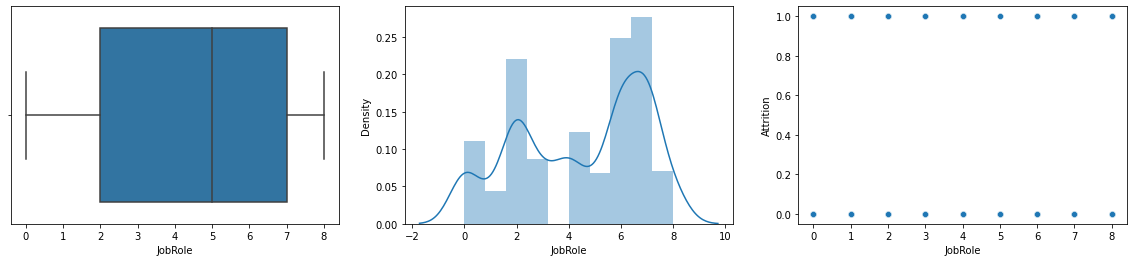

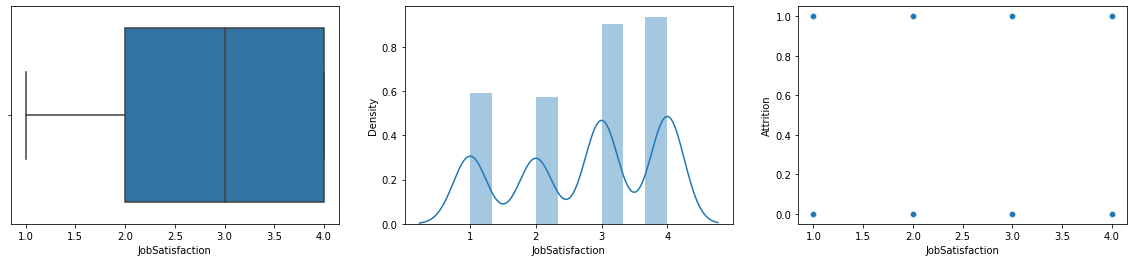

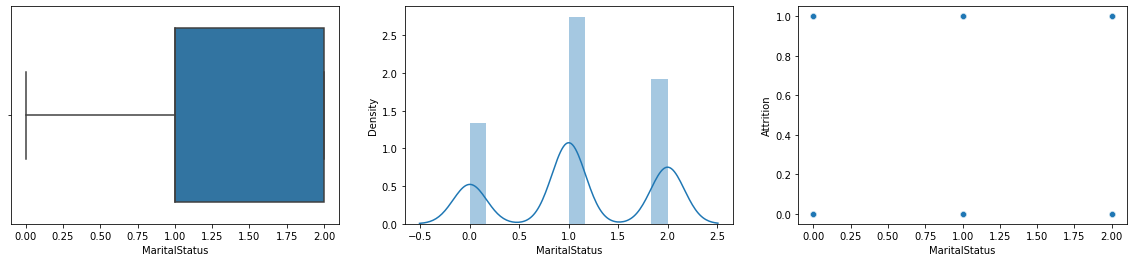

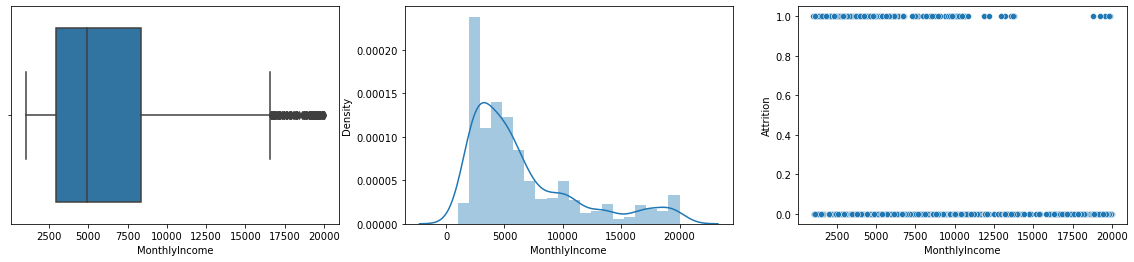

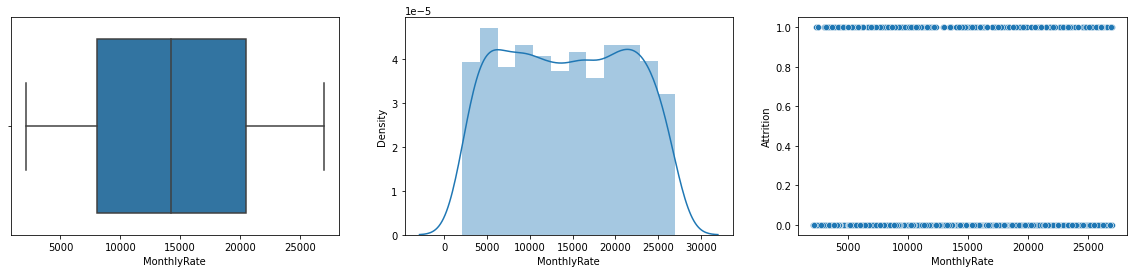

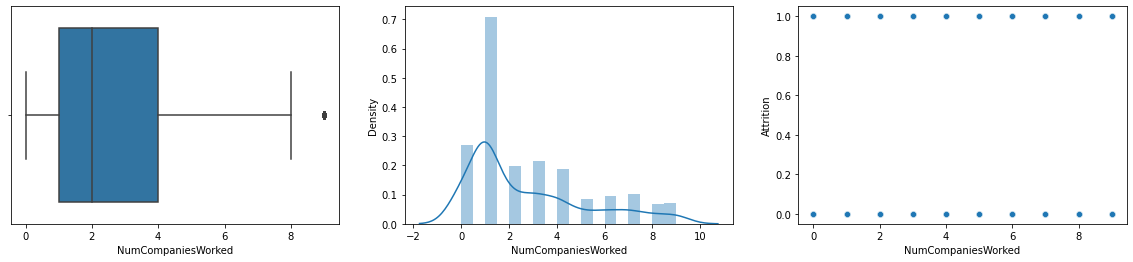

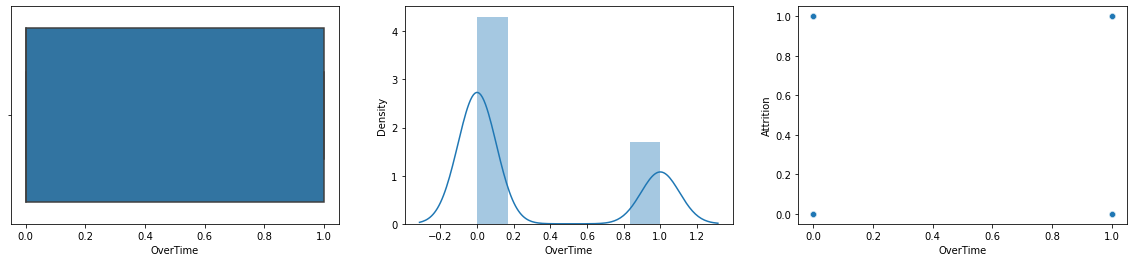

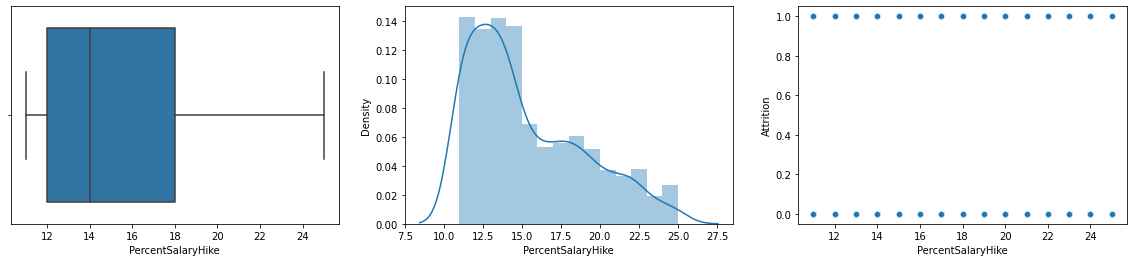

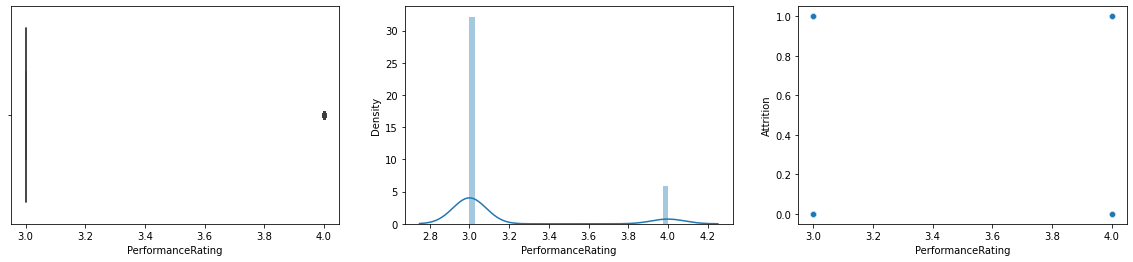

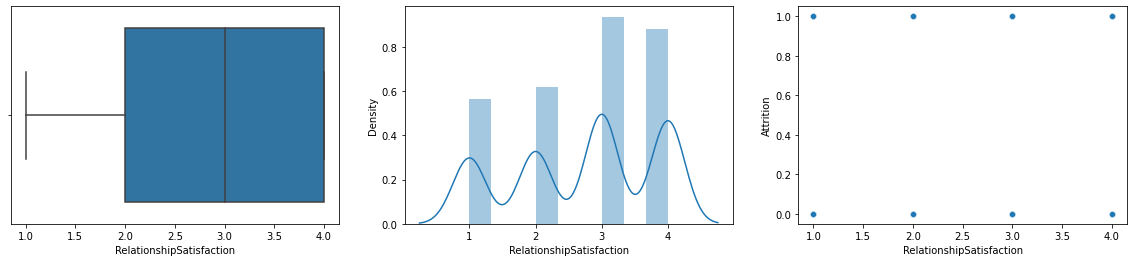

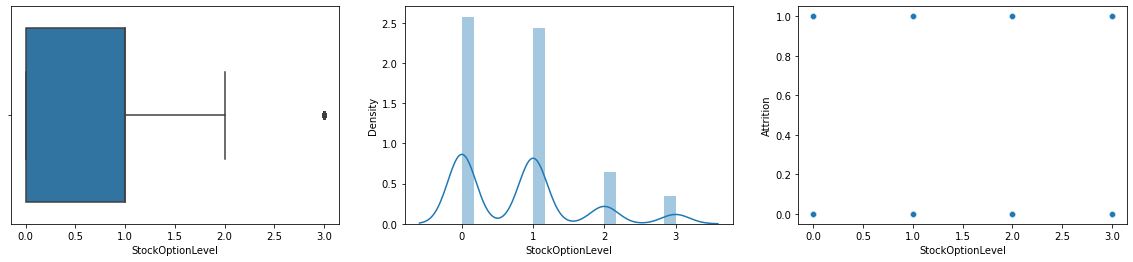

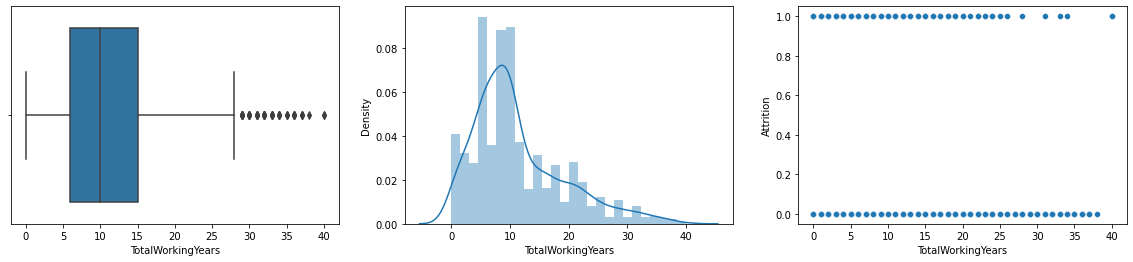

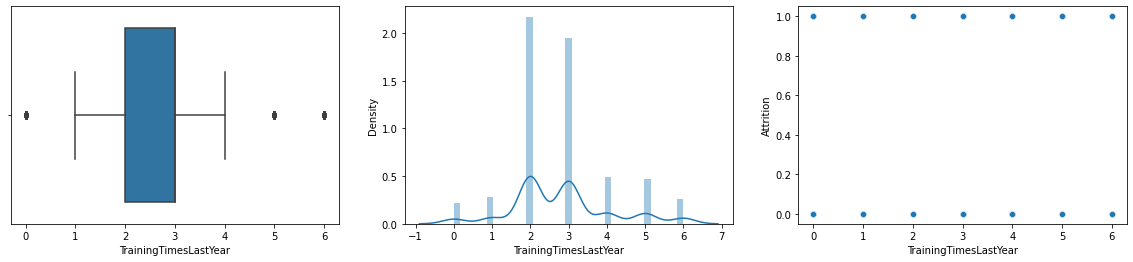

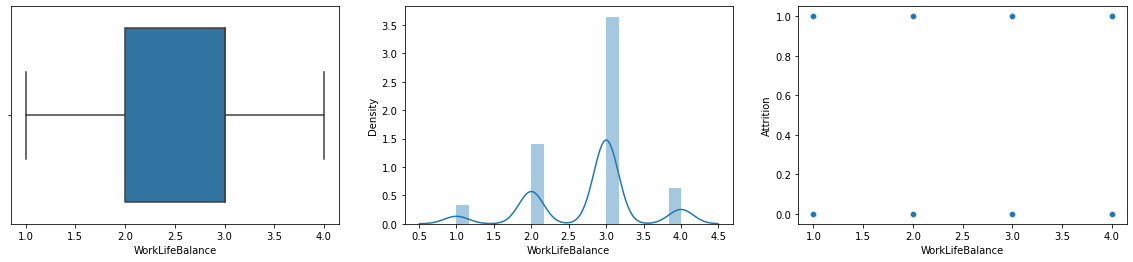

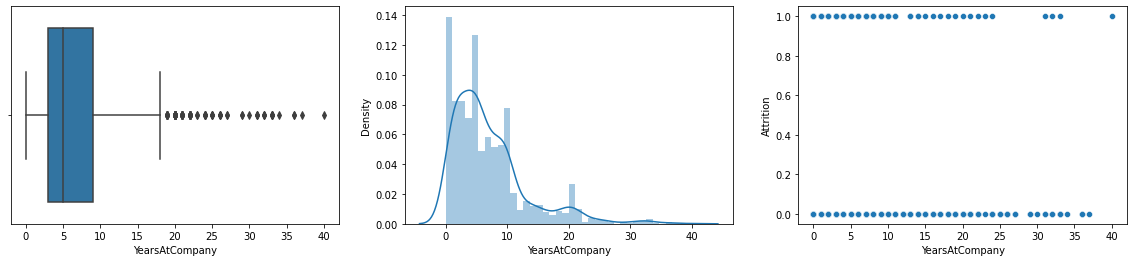

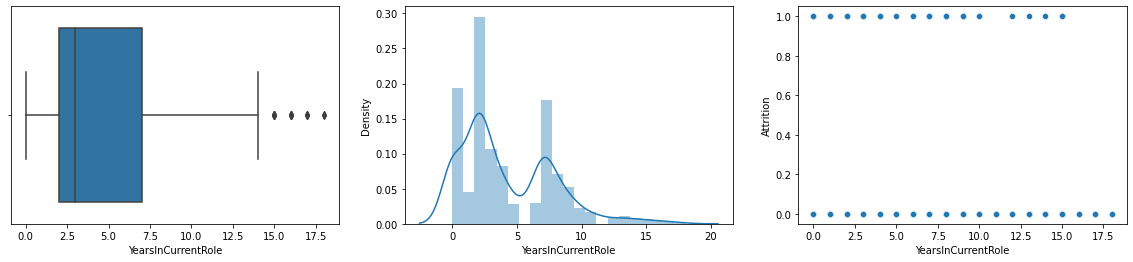

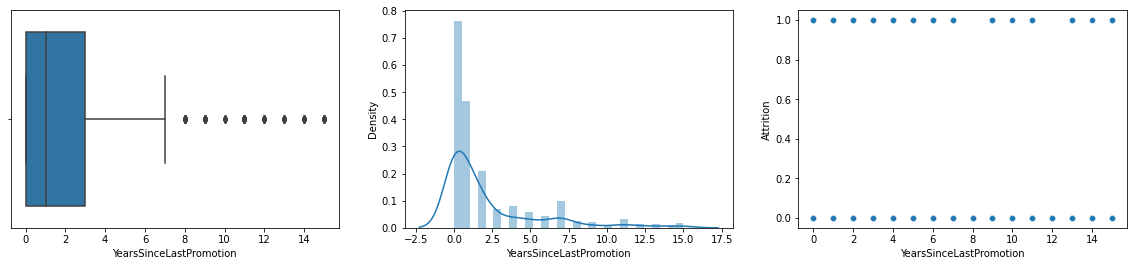

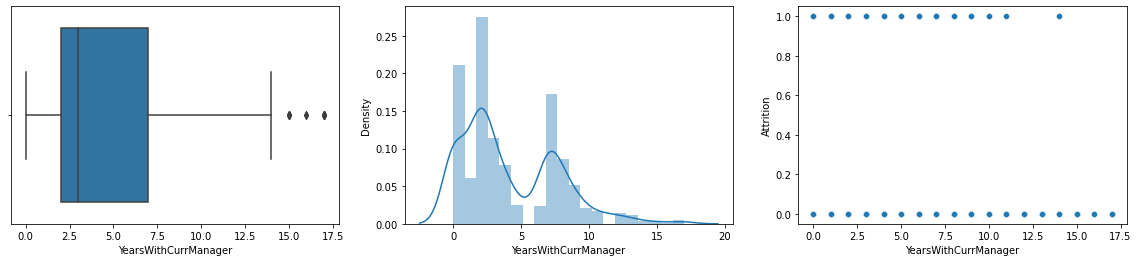

In [27]:
target_variable = 'Attrition'
feature_variable = ['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

def num_plots(feature_name):
    fig,axs = plt.subplots(1,3,figsize=(20,4))
    a = sns.boxplot(x=df[feature_name],ax=axs[0])
    b = sns.distplot(df[feature_name],ax=axs[1])
    c = sns.scatterplot(data=df,x=feature_name,y=target_variable)
    
for i in feature_variable:
    num_plots(i)

The above analysis shows the relationship between target_variable and the feature_variables

# Scaling the data

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# MultiColinearity

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,2.104300,Age
1,1.024531,DailyRate
2,2.026879,Department
3,1.012927,DistanceFromHome
4,1.070786,Education
5,1.026194,EducationField
6,1.025175,EmployeeNumber
7,1.020297,EnvironmentSatisfaction
8,1.021093,Gender
9,1.022503,HourlyRate


As all columns have less vif value we have no multicolinearity in our data. We can continue further analysis.

In [53]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

# Balancing dataset using SMOTE

In [59]:
import sklearn
sklearn.__version__

'1.0.2'

In [60]:
from imblearn.over_sampling import SMOTE


In [61]:
smt = SMOTE()
train_x,train_y = smt.fit_resample(x,y)


In [62]:
train_y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

# Training the model

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

acc = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,random_state=i,test_size=.22)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    temp = accuracy_score(y_test,y_pred)
    if temp > acc:
        acc = temp
        best_rstate = i
print("Accuracy : ",acc,"Random State : ",best_rstate)   

Accuracy :  0.8416206261510129 Random State :  800


In [71]:
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,random_state=923,test_size=.22)

In [72]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [73]:
gnb = GaussianNB()
svc = SVC()
kn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()

model = [gnb,svc,kn,dtc,rfc,ada]

In [74]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy Score of ",m," is",accuracy_score(y_test,predm))
    print("Mean Absolute Error of ", m , " is ",mean_absolute_error(y_test,predm))
    print("Mean Squared error of ",m," is",mean_squared_error(y_pred,predm))
    print("r2_score : ",m, " is ",r2_score(y_test,predm))
    
    print("Confusion Matrix is : ",confusion_matrix(y_test,predm))
    print("Classification Report is : ",classification_report(y_test,predm))
    print("\n\n")

Accuracy Score of  GaussianNB()  is 0.7292817679558011
Mean Absolute Error of  GaussianNB()  is  0.27071823204419887
Mean Squared error of  GaussianNB()  is 0.4953959484346225
r2_score :  GaussianNB()  is  -0.08349395954934158
Confusion Matrix is :  [[189  76]
 [ 71 207]]
Classification Report is :                precision    recall  f1-score   support

           0       0.73      0.71      0.72       265
           1       0.73      0.74      0.74       278

    accuracy                           0.73       543
   macro avg       0.73      0.73      0.73       543
weighted avg       0.73      0.73      0.73       543




Accuracy Score of  SVC()  is 0.9152854511970534
Mean Absolute Error of  SVC()  is  0.0847145488029466
Mean Squared error of  SVC()  is 0.47513812154696133
r2_score :  SVC()  is  0.6609474684403421
Confusion Matrix is :  [[241  24]
 [ 22 256]]
Classification Report is :                precision    recall  f1-score   support

           0       0.92      0.91      0.91

RandomForestRegression has more accuracy of 93.1%

# Cross Validation:

In [75]:
from sklearn.model_selection import cross_val_score,cross_val_predict
mean_score = []
std = []

for m in model:
    CV = cross_val_score(m,x,y,cv=5)
    print("Score of ",m," is ",CV)
    print("Mean Score is ",CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation is ",CV.std())
    std.append(CV.std())
    print("\n")


Score of  GaussianNB()  is  [0.85034014 0.81292517 0.80952381 0.79591837 0.86394558]
Mean Score is  0.826530612244898
Standard Deviation is  0.02599316078169086


Score of  SVC()  is  [0.8707483  0.84353741 0.87414966 0.86394558 0.8707483 ]
Mean Score is  0.8646258503401361
Standard Deviation is  0.011053113475695153


Score of  KNeighborsClassifier()  is  [0.84353741 0.82653061 0.85714286 0.84013605 0.8537415 ]
Mean Score is  0.8442176870748298
Standard Deviation is  0.010841753367693318


Score of  DecisionTreeClassifier()  is  [0.74489796 0.79931973 0.67346939 0.78571429 0.76190476]
Mean Score is  0.753061224489796
Standard Deviation is  0.044013132298290646


Score of  RandomForestClassifier()  is  [0.84353741 0.8537415  0.85714286 0.85034014 0.85034014]
Mean Score is  0.8510204081632653
Standard Deviation is  0.004512414680755614


Score of  AdaBoostClassifier()  is  [0.83673469 0.8537415  0.8707483  0.87755102 0.84013605]
Mean Score is  0.85578231292517
Standard Deviation is  0.0

In [76]:
scr = cross_val_score(lr,x,y,cv=5)
print("Cross Val Score is", scr.mean())
print("Standard Deviation is ",scr.std())

Cross Val Score is 0.8693877551020408
Standard Deviation is  0.0046138299204933845


We have logistic Regression with more accuracy of 86.9%

# HyperTuning

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
parameters = {'learning_rate':[0.001,0.01,0.1,0.5],
             'subsample':[0.9,0.5,0.2,0.1],
             'n_estimators':[100,150,200,250],
             'max_depth':[4,5,6,10]}

grid_GBR = GridSearchCV(estimator=GBR,param_grid=parameters,cv=2,n_jobs=1)
grid_GBR.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'max_depth': [4, 5, 6, 10],
                         'n_estimators': [100, 150, 200, 250],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [78]:
grid_GBR.best_score_

0.7068774436567508

In [79]:
print("Results from Grid Search : ")
print("\n The best estimator across all search params :",grid_GBR.best_estimator_)
print("\n The best score for all searched params :",grid_GBR.best_score_)
print("\n The best parameters for all searched params : ",grid_GBR.best_params_)

Results from Grid Search : 

 The best estimator across all search params : GradientBoostingRegressor(max_depth=5, n_estimators=250, subsample=0.9)

 The best score for all searched params : 0.7068774436567508

 The best parameters for all searched params :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250, 'subsample': 0.9}


Logistic Regression gives more accuracy befor tuning so we will take 86.9% accuracy

# AUC-ROC Curve

In [80]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [81]:
y_pred_prob = lr.predict_proba(x_test)[:,1] 

In [82]:
y_pred_prob

array([0.93875102, 0.12661619, 0.32017103, 0.36974935, 0.6485497 ,
       0.07755432, 0.24470259, 0.0893873 , 0.84888718, 0.44362394,
       0.26974791, 0.02741721, 0.19373532, 0.53818419, 0.67917816,
       0.46520009, 0.07322653, 0.24165322, 0.4581106 , 0.21441599,
       0.90095182, 0.93578533, 0.08289546, 0.94294605, 0.66402668,
       0.12115957, 0.53022966, 0.12982172, 0.74304011, 0.62410557,
       0.18383177, 0.93786539, 0.91212929, 0.69767405, 0.07434604,
       0.96037792, 0.24218859, 0.41274281, 0.20187154, 0.94664626,
       0.07714916, 0.47999274, 0.40739233, 0.90525298, 0.35482766,
       0.49514118, 0.60954932, 0.98112232, 0.93645334, 0.07067552,
       0.04141064, 0.35442415, 0.54212922, 0.26984   , 0.5588815 ,
       0.90774525, 0.2821193 , 0.21315292, 0.77953082, 0.15165707,
       0.68238962, 0.96126968, 0.65384147, 0.04534411, 0.39700707,
       0.6681716 , 0.51431771, 0.7371107 , 0.96217765, 0.80740487,
       0.35165928, 0.11743506, 0.30547036, 0.6884233 , 0.51177

In [83]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

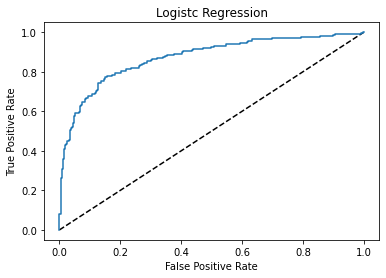

In [84]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistc Regression')
plt.show()

In [85]:
auc_score = roc_auc_score(y_test,lr.predict(x_test))

In [86]:
print(auc_score)

0.805117415501561


# Conclusion:

we will take Logistic Regression with 86.9% as accuracy.

In [88]:
pred = lr.predict(x_test)
final = pd.DataFrame(pred)
final

,0
0,1
1,0
2,0
3,0
4,1
...,...
538,1
539,0
540,1
541,0


# Saving the best model

In [89]:
import joblib
joblib.dump(lr,'HR_attrition_rate.obj')

['HR_attrition_rate.obj']